In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print(len(X_train), len(X_test))

60000 10000


In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

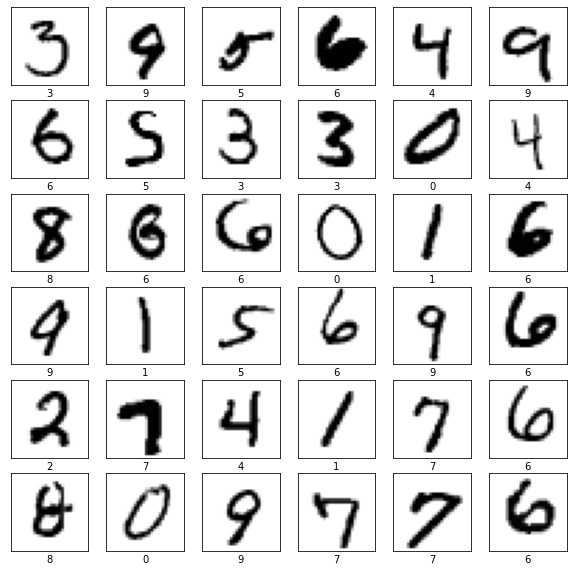

In [5]:
rndsuff = np.random.randint(0, len(X_train)-1, size=len(X_train), dtype='l')

# Show images and labels
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6, 6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[rndsuff[i]], cmap=plt.cm.binary)
    plt.xlabel(y_train[rndsuff[i]])
plt.show()

In [6]:
X_valid, X_train = X_train[:1000], X_train[55000:]
y_valid, y_train = y_train[:1000], y_train[55000:]

X_test = X_test[:1000]
y_test = y_test[:1000]

In [7]:
# Fully connected network
model = keras.Sequential([    
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(17, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 17)                13345     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                180       
Total params: 13,525
Trainable params: 13,525
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 5000 samples, validate on 1000 samples
Epoch 1/10
5000/5000 [==============================] - 1s 150us/sample - loss: 1.3159 - accuracy: 0.6364 - val_loss: 0.7009 - val_accuracy: 0.8110
Epoch 2/10
5000/5000 [==============================] - 0s 53us/sample - loss: 0.4670 - accuracy: 0.8874 - val_loss: 0.4789 - val_accuracy: 0.8610
Epoch 3/10
5000/5000 [==============================] - 0s 52us/sample - loss: 0.3274 - accuracy: 0.9150 - val_loss: 0.4196 - val_accuracy: 0.8700
Epoch 4/10
5000/5000 [==============================] - 0s 51us/sample - loss: 0.2700 - accuracy: 0.9274 - val_loss: 0.3974 - val_accuracy: 0.8760
Epoch 5/10
5000/5000 [==============================] - 0s 51us/sample - loss: 0.2366 - accuracy: 0.9356 - val_loss: 0.3747 - val_accuracy: 0.8870
Epoch 6/10
5000/5000 [==============================] - 0s 52us/sample - loss: 0.2077 - accuracy: 0.9432 - val_loss: 0.3707 - val_accuracy: 0.8830
Epoch 7/10
5000/5000 [==============================] - 0s 51us/sampl

In [11]:
model.evaluate(X_test, y_test)

1000/1000 [==============================] - 0s 32us/sample - loss: 0.3181 - accuracy: 0.9000


[0.3181352822780609, 0.9]

In [12]:
def classifier(predictions) :
    rtn = []    
    for prediction in predictions :
        rtn.append(np.argmax(prediction))                
    return np.array(rtn)

In [13]:
predictions = classifier(model.predict(X_test))

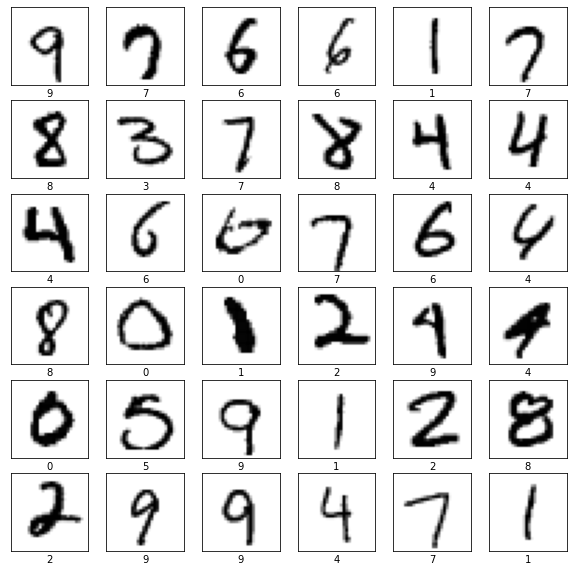

In [14]:
rndsuff = np.random.randint(0, len(X_test)-1, size=len(X_test), dtype='l')

# Show images and labels
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6, 6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[rndsuff[i]], cmap=plt.cm.binary)
    plt.xlabel(predictions[rndsuff[i]])
plt.show()

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, 3, activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])  

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1352)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                13530     
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 5000 samples, validate on 1000 samples
Epoch 1/10
5000/5000 [==============================] - 2s 388us/sample - loss: 0.9167 - accuracy: 0.7872 - val_loss: 0.4687 - val_accuracy: 0.8680
Epoch 2/10
5000/5000 [==============================] - 1s 283us/sample - loss: 0.2923 - accuracy: 0.9160 - val_loss: 0.3832 - val_accuracy: 0.8870
Epoch 3/10
5000/5000 [==============================] - 1s 282us/sample - loss: 0.2371 - accuracy: 0.9318 - val_loss: 0.3537 - val_accuracy: 0.8960
Epoch 4/10
5000/5000 [==============================] - 1s 282us/sample - loss: 0.2058 - accuracy: 0.9406 - val_loss: 0.3322 - val_accuracy: 0.9080
Epoch 5/10
5000/5000 [==============================] - 1s 283us/sample - loss: 0.1841 - accuracy: 0.9462 - val_loss: 0.3258 - val_accuracy: 0.9060
Epoch 6/10
5000/5000 [==============================] - 1s 277us/sample - loss: 0.1648 - accuracy: 0.9532 - val_loss: 0.3201 - val_accuracy: 0.9120
Epoch 7/10
5000/5000 [==============================] - 1s 280us

In [19]:
model.evaluate(X_test, y_test)

1000/1000 [==============================] - 0s 141us/sample - loss: 0.3024 - accuracy: 0.9150


[0.30236603343486784, 0.915]

In [20]:
predictions = classifier(model.predict(X_test))

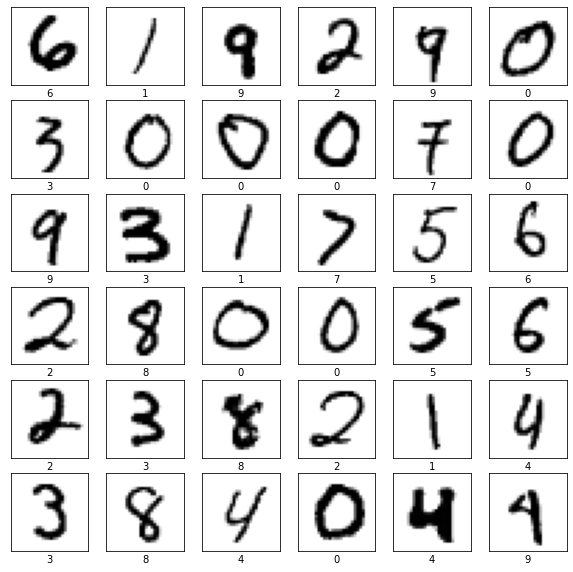

In [21]:
rndsuff = np.random.randint(0, len(X_test)-1, size=len(X_test), dtype='l')

# Show images and labels
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6, 6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[rndsuff[i]], cmap=plt.cm.binary)
    plt.xlabel(predictions[rndsuff[i]])
plt.show()